Trabalho 1 - Olavo Morais Borges Pereira - 11297792

In [3]:
#Inclui as bibliotecas básicas usadas no código
import numpy as np
import time
from math import sqrt

# **1)Considere a matriz A e o vetor b dados abaixo:**

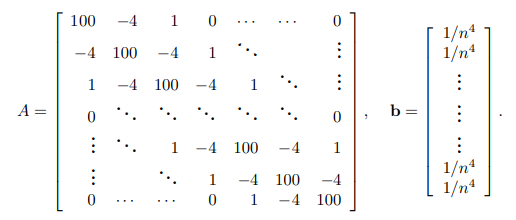

# a) Escreva um código que monte a matriz A para n = 1000.

Para criar a matriz A, são usadas as seguintes regras: elemento da diagonal é definido como 100, uma casa de distância da diagonal é -4 e duas casas da diagonal é 1. Os demais elementos são 0.

Todos os elementos de b são $\frac{1}{n^2}$

In [4]:
#Define a variável com o tamanho da matriz A e inicia as matrizes com elementos 0
n=1000
A=np.zeros(shape=(n,n))
b=np.zeros(shape=(n))

#Varre todos os elementos de A
for i in range(n):
    b[i]=1/(n*n)#Define o i-ésimo elemento de b
    for j in range(n):
        if (j==i):#Se é um elemento da diagonal principal
          A[i][j]=100
        elif j==i+1 or j==i-1:#Se está a uma casa da diagonal principal
          A[i][j]=-4
        elif j==i+2 or j==i-2:#Se está a duas casas da diagonal principal
          A[i][j]=1
        #Demais elementos da A já valem 0

#Exibe as matrizes criadas
print(A)
print(b)

[[100.  -4.   1. ...   0.   0.   0.]
 [ -4. 100.  -4. ...   0.   0.   0.]
 [  1.  -4. 100. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 100.  -4.   1.]
 [  0.   0.   0. ...  -4. 100.  -4.]
 [  0.   0.   0. ...   1.  -4. 100.]]
[1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-0

# b) Escreva um código que faça a decomposição de Cholesky de uma matriz simétrica definida positiva qualquer.

Decomposição de Cholesky de uma matriz A consiste em obter uma matriz triangular inferior H tal que $A=H\cdot H^t$

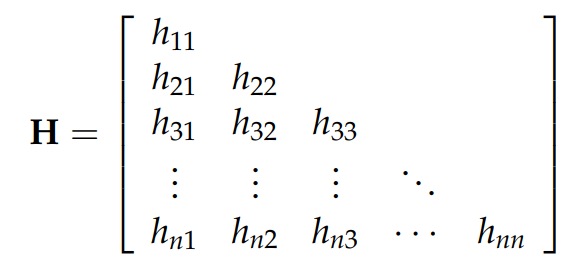

Podemos concluir o seguinte:

*   A primeira linha só tem um elemento não nulo, a segunda linha só tem dois elementos não nulos e assim sucessivamente então ao determinar o elemento $h_{ij}$ basta $i$ variar da primeira até a última linha e $j$ varia da primeira coluna até a coluna $i$
*   $a_{ij}$=linha $i$ de H "vezes" coluna $j$ de $H^t$ = linha $i$ de H "vezes" linha $j$ de H, ou seja, $a_{ij}$=primeiro elemento da linha $i$ vezes primeiro elemento da linha $j$ + segundo da linha $i$ vezes segundo da $j$...
*   Como $j\le i$, então a linha $j$ possui menos elementos não nulos que a linha $i$. Portanto basta somar até acabar os elementos da linha $j$ 

Assim, chegamos na fórmula:

*   $a_{ij}=\Sigma_{k=1}^j h_{ik}\cdot h_{jk}$
*   $a_{ij}=\Sigma_{k=1}^{j-1} (h_{ik}\cdot h_{jk}) + h_{ij}\cdot h_{jj}$
*   $h_{ij}=\frac{a_{ij}-\Sigma_{k=1}^{j-1} (h_{ik}\cdot h_{jk})}{h_{jj}}$

Um caso particular é quando $i=j$. Nesse caso a fórmula é: $h_{jj}=\sqrt{a_{jj}-\Sigma_{k=1}^{j-1}h_{jk}^2}$


In [5]:
def cholesky_dec(A):#Recebe a matriz a ser decomposta
  H=np.zeros(shape=(len(A),len(A)))#Cria e define a matriz H com todos os elementos iguais a zero

  for i in range(len(A)):#i varia da primeira linha até a última
    for j in range(i+1):#j varia de 0 até i

      sum=0 #Calcula a soma usada para determinar os elementos da matriz H
      for k in  range(j):
        sum+=H[i][k]*H[j][k]#Multiplica o k-ésimo elemento da linha i com o k-ésimo elemento da linha j e realiza o somatório, Faz isso para os k elementos da linha j
      
      if(i==j):#Se é um elemento da diagonal principal
        H[i][j]=sqrt(A[i][i]-sum)
      else:#Se não é um elemento da diagonal principal
        H[i][j]=(A[i][j]-sum)/H[j][j]

  return H #Retorna a matriz H

#Teste da função
#A=[[4,2,6],[2,2,5],[6,5,22]]
print(cholesky_dec(A))

[[10.          0.          0.         ...  0.          0.
   0.        ]
 [-0.4         9.9919968   0.         ...  0.          0.
   0.        ]
 [ 0.1        -0.39631718  9.99164314 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  9.99164043  0.
   0.        ]
 [ 0.          0.          0.         ... -0.39636438  9.99164043
   0.        ]
 [ 0.          0.          0.         ...  0.10008367 -0.39636438
   9.99164043]]


# c) Usando as rotinas implementadas anteriormente, escreva um código para resolver um sistema Ax = b.

É fácil resolver um sistema que a matriz de coeficientes é triangular, basta implementar um algoritmo de substituição

Para uma matriz triangular inferior: $x_i=\frac{b_i-\Sigma_{j=1}^{i-1}(a_{ij}\cdot x_j)}{a_{ii}}$

Para uma matriz triangular superior: $x_i=\frac{b_i-\Sigma_{j=i+1}^{n}(a_{ij}\cdot x_j)}{a_{ii}}$

Agora basta usar a decomposição de Cholesky para obter uma matriz H tal que $A=H\cdot H^t$

$A\cdot x=b$

$H\cdot H^t\cdot x=b$

Se chamarmos $y=H^t\cdot x$ basta resolver o sistema $H\cdot y=b$ e depois $H^t\cdot x=y$

In [6]:
def triangular_inferior(A,b):#Recebe a matriz dos coeficientes e o vetor dos termos independentes
  x=np.zeros(shape=(len(A)))#Define o vetor x com o tamanho de n e com todos os valores iguais a zero
  
  for i in range(len(A)):#i varia de 0 até n-1
    sum=0
    for j in range(i):#j varia até i, calcula a soma necessária para definir a i-ésima variável
      sum+=A[i][j]*x[j]
    x[i]=(b[i]-sum)/A[i][i]
  return x #Retorna o vetor com a solução do sistema

def triangular_superior(A,b):#Recebe a matriz dos coeficientes e o vetor dos termos independetes
  x=np.zeros(shape=(len(A)))#Define o vetor x com o tamanho de n e com todos os valores iguais a zero
  
  for i in range(len(A)-1,-1,-1):#i varia de n-1 até 0
    sum=0;
    for j in range(i+1,len(A)):#j varia até i, calcula a soma necessária para definir a i-ésima variável
      sum+=A[i][j]*x[j]                     
    x[i]=(b[i]-sum)/A[i][i]
  return x #Retorna o vetor com a solução do sistema

def resolver_cholesky(A,b):#Recebe a matriz dos coeficientes e o vetor dos termos independetes
  H=cholesky_dec(A) #Decompõe a matriz A
  y=triangular_inferior(H,b) #Resolve o sistema triangular inferior com H e b e armazena o resultado em um vetor y
  return triangular_superior(H.T,y)#Resolve o sistema triangular inferior com H transposta e y e retorna o resultado

#Testando as funções
#A=[[4,2,6],[2,2,5],[6,5,22]]
#b=[26,21,82]
start=time.time()
print(resolver_cholesky(A,b))
print("--- Resolver por decomposição de Cholesky: %s segundos---" % (time.time()-start))

[1.03228419e-08 1.07323449e-08 1.06451885e-08 1.06376292e-08
 1.06382023e-08 1.06383008e-08 1.06382989e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.063829

# d) Escreva um código implementando o método de Jacobi para resolver um sistema $A\cdot x=b$. Utilize o erro absoluto como critério de parada.

Dado uma matriz de coeficientes A e uma matriz de termos independes b, o sistema pode ser escrito como $A\cdot x=b$, com $x=(x_1,x_2,x_3...x_n)$ o vetor que contém a solução do sistema

Dado o sistema: 

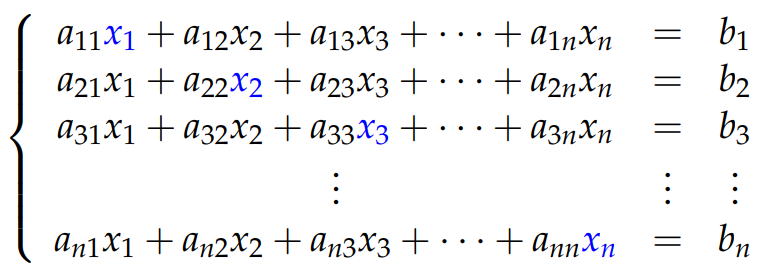

Podemos isolar a primeira variável na primeira linha, isolar a segunda variável na segunda linha e assim sucessivamente:

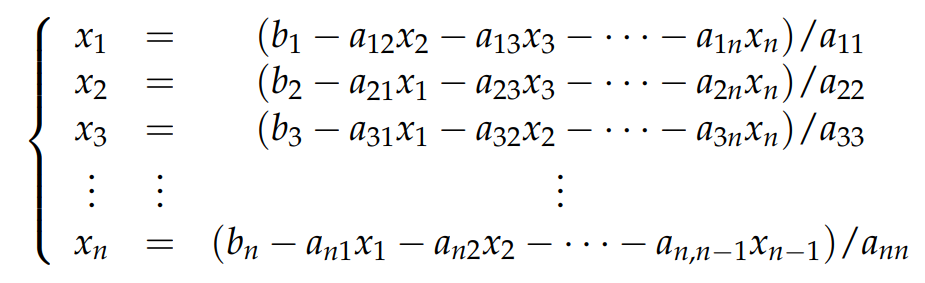

Dessa forma, $x=Cx+G$ em que $C$ e $G$ são:
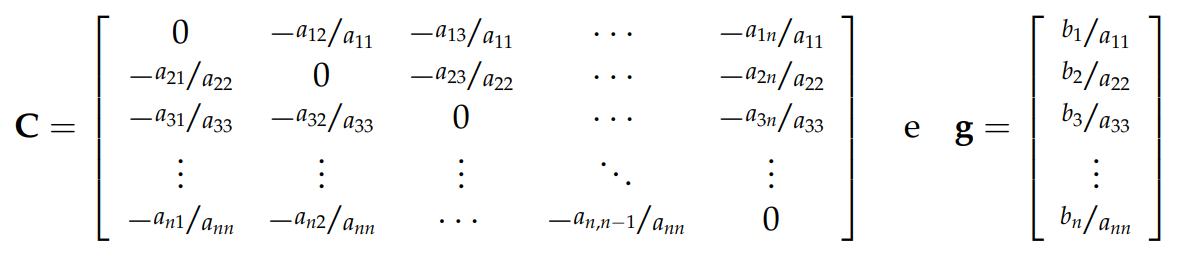

Assim, se tivermos um palpite para $x$, podemos calcular um novo palpite $x$ e repetir o processo até alguma condição de parada.

In [7]:
def jacobi(A,b,x0,err): #Recebe a matriz dos coeficientes, o vetor dos termos independetes, o palpite inicial x0 e o erro para ser usado como critério de parada
  
  #Cria e inicializa a matriz C e o vetor G
  C=np.zeros(shape=(len(A),len(A)))
  G=np.zeros(shape=(len(A)))

  for i in range(len(A)):
    G[i]=b[i]/A[i][i]
    for j in range(len(A)):
      if i!=j:
        C[i][j]=-1*A[i][j]/A[i][i]

  x=np.dot(C,x0)+G #Primeira iteração
  contador=1;
  while np.linalg.norm(x-x0)>err: #Enquanto a diferença entre x e x0 for maior que o erro
    #Atualiza x0 e x
    x0=x
    x=np.dot(C,x0)+G
    contador+=1
  
  print(contador)
  return x#Retorna o resultado

#Testando a função
#A=[[25,15,-5],[15,18,0],[-5,0,11]]
#b=[40,51,28]
x0=np.zeros(shape=(len(A)))
print(jacobi(A,b,x0,10**(-15)))

8
[1.03228419e-08 1.07323449e-08 1.06451885e-08 1.06376292e-08
 1.06382023e-08 1.06383008e-08 1.06382989e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.0638

# e) Vamos comparar o método direto de Cholesky com o iterativo de Jacobi neste exemplo. Observe quanto tempo leva para resolver o sistema usando Cholesky. Quantas iterações foram necessárias no método de Jacobi para obtermos a mesma precisão da solução dada pelo método de Cholesky ?

Foram necessários cerca de 110 segundos para resolver o sistema usando decomposição de Cholesky e Algoritmos de substituição.

Para resolver o mesmo sistema usando o método iterativo de Jacobi foram necessárias 8 iterações.

# f) É possível melhorar a implementação da decomposição de Cholesky para o exemplo em questão ?

Como a matriz A é uma matriz de banda, então a matriz H também é uma matriz de banda.

Sendo assim, podemos calcular apenas os elementos que nos convém

In [10]:
def cholesky_dec_opt(A):#Recebe a matriz a ser decomposta
  H=np.zeros(shape=(len(A),len(A)))#Cria e define a matriz H com todos os elementos iguais a zero

  for i in range(len(A)):#i varia da primeira linha até a última
    for j in range(max(0,i-2),i+1):#j varia por somente 3 valores

      sum=0 #Calcula a soma usada para determinar os elementos da matriz H
      for k in  range(j):
        sum+=H[i][k]*H[j][k]
      
      if(i==j):#Se é um elemento da diagonal principal
        H[i][j]=sqrt(A[i][i]-sum)
      else:#Se não é um elemento da diagonal principal
        H[i][j]=(A[i][j]-sum)/H[j][j]

  return H #Retorna a matriz H

start=time.time()
print(cholesky_dec_opt(A))
print("--- Decomposição de Cholesky Otimizada: %s segundos ---" % (time.time()-start))
#Verifica se as duas matrizes são iguais
print(np.linalg.norm(cholesky_dec_opt(A)-cholesky_dec(A)))

[[10.          0.          0.         ...  0.          0.
   0.        ]
 [-0.4         9.9919968   0.         ...  0.          0.
   0.        ]
 [ 0.1        -0.39631718  9.99164314 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  9.99164043  0.
   0.        ]
 [ 0.          0.          0.         ... -0.39636438  9.99164043
   0.        ]
 [ 0.          0.          0.         ...  0.10008367 -0.39636438
   9.99164043]]
--- Decomposição de Cholesky Otimizada: 1.6453707218170166 segundos ---
0.0


# 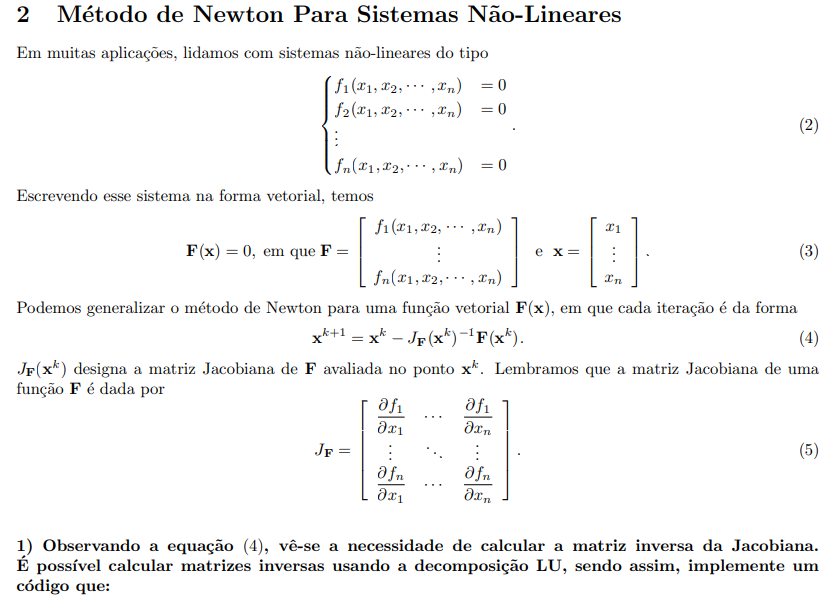

# a) Calcule a fatoração LU de uma matriz qualquer;

Fazer a fatoração LU de uma matriz A significa encontrar as matrizes L e U tal que $A=L\cdot U$ e L é uma matriz triangular inferior com todos os elementos da diagonal iguais a 1 e U é uma matriz triangular superior

Podemos obter as fórmulas para os termos $l_{ij}$ e $u_{ij}$ de forma muito semelhante ao que feito na decomposição de Cholesky


$a_{ij}=\Sigma_{k=1}^i(l_{ik}\cdot u_{kj})$

$a_{ij}=\Sigma_{k=1}^{i-1}(l_{ik}\cdot u_{kj})+l_{ii}\cdot u_{ij}$

$u_{ij}=a_{ij}-\Sigma_{k=1}^{i-1}(l_{ik}\cdot u_{kj})$

De forma semelhante chegamos à fórmula genérica para $l_{ij}$

$l_{ij}=\frac{a_{ij}-\Sigma_{k=1}^{j-1}(l_{ik}\cdot u_{kj})}{u_{jj}}$



In [11]:
def LU_dec(A): #Recebe uma matriz e retorna o resultado da deconposição LU
  
  #Incia as matrizes L e U
  L=np.identity(len(A))
  U=np.zeros(shape=(len(A),len(A)))

  #Calcula os elementos de I e U
  for aux in range(len(A)):#aux varia de 0 até n-1
    for j in range(aux,len(A)):#j varia de aux até n-1
      sum=0
      for k in range(aux):#Calcula o somatório necessário para calcular os elementos de U
        sum+=L[aux][k]*U[k][j]
      U[aux][j]=A[aux][j]-sum
    
    for i in range(aux+1,len(A)):#j varia de aux+1 até n-1
      sum=0
      for k in range(aux):#Calcula o somatório necessário para calcular os elementos de L
        sum+=L[i][k]*U[k][aux]
      L[i][aux]=(A[i][aux]-sum)/U[aux][aux]

  return [L,U] #Retorna as duas matrizes

#Testando a função
#A=[[1,2,3],[4,5,6],[7,8,9]]
print(LU_dec(A))

[array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04      ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01      , -0.03966346,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.0396696 ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.01001674,
        -0.0396696 ,  1.        ]]), array([[100.        ,  -4.        ,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  99.84      ,  -3.96      , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  99.83293269, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 

# b) Resolva um sistema linear cujo lado direito é uma matriz;

Usando a Decomposição LU e os algoritmos de substituição
$A=L\cdot U$

$A\cdot x=b$

$L\cdot U\cdot x=b$

Se chamarmos $y=U\cdot x$ basta resolver o sistema $L\cdot y=b$ e depois $U\cdot x=y$

In [12]:
def resolver_LU(A,b): #Resolve um sistema por meio da decomposição LU
  matrizes_LU=LU_dec(A)#Faz a decomposição LU da matriz A
  y=triangular_inferior(matrizes_LU[0],b)#Resolve um sistema com L como matriz dos coeficientes e b como vetor dos termos independentes, salva o resultado em y
  return triangular_superior(matrizes_LU[1],y)#Resolve um sistema com U como matriz dos coeficientes e b como vetor dos termos independtes e retorna o resultado

#Testando a função
#A=[[25,15,-5],[15,18,0],[-5,0,11]]
#b=[40,51,28]

print(resolver_LU(A,b))

[1.03228419e-08 1.07323449e-08 1.06451885e-08 1.06376292e-08
 1.06382023e-08 1.06383008e-08 1.06382989e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.06382979e-08 1.06382979e-08 1.06382979e-08
 1.06382979e-08 1.063829

# c) Finalmente, calcule a inversa de uma matriz qualquer resolvendo vários sistemas lineares

Encontrar a matriz $A^{-1}$ tal que $A\cdot A^{-1}=I$

ou seja, $A\cdot [v_1|v_2|v_3|...v_n]=[e_1|e_2|e_3|...e_n]$
em que $v_i$ é a i-ésima coluna da $A^{-1}$ e $e_i$ é a i-ésima coluna da matriz identidade.


Portanto basta resolver os sistemas $A\cdot v_i=e_i$ com i=1,2,3...n para obter a matriz inversa de A

In [13]:
def inversa(A):#Recebe uma matriz A e retorna sua inversa
  A_inv=np.zeros(shape=(len(A),len(A)))#Cria a matriz inversa
  I=np.identity(len(A))#Matriz identidade, usada para calcular a inversa
  for i in range(len(A)):#i varia de 0 até n-1
    A_inv[i]=resolver_LU(A,I[i])#Calcula a i-ésima coluna da A inversa resolvendo um sistema, salva como a i-ésima linha
  A_inv=A_inv.T#Transpõe a Matriz A inversa
  return A_inv#Retorna A inversa

A=[[1,2,3],[0,1,4],[0,0,1]]
print(inversa(A))

[[ 1. -2.  5.]
 [ 0.  1. -4.]
 [ 0.  0.  1.]]


# **2) Implemente o método de Newton para sistemas usando a rotina implementada no item anterior. Lembre-se de especificar o critério de parada utilizado.**

Implementação do código usado no enunciado. O critério de parada foi $k_{max}=1000$

In [14]:
def resolver_newton(F,JacF,x0):#Recebe a função F, a matriz jacobiana de F e um palpite x0 e retorna a solução do sistema não linear 
  x=x0-np.dot(inversa(JacF(x0)),F(x0))#Calcula o próximo palpite
  for i in range(1000):#Condição de parada
    #Atualiza os vetores 
    x0=x
    x=x0-np.dot(inversa(JacF(x0)),F(x0))
  return x#Retorna o resultado

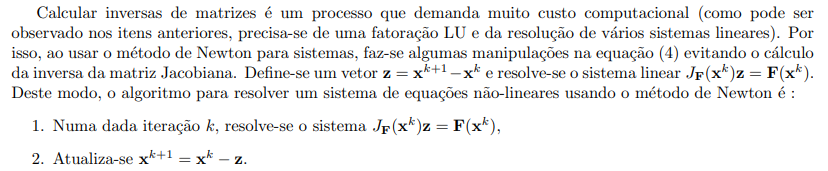

# **3) Implemente novamente o método de Newton para sistemas usando o algoritmo anterior. Utilize as rotinas já implementadas neste trabalho para resolução do sistema linear, indicando sempre qual está usando.**

In [15]:
def resolver_newton_opt(F,JacF,x0):#Recebe um palpite inicial e retorna a solução do sistema utilizando o método de Newton otimizado
  for i in range(1000):#Condição de parada k máximo
    z=resolver_LU(JacF(x0),F(x0)) #Utiliza o método LU para resolver um sistema e armazena em z
    x0=x0-z#Atualiza o valor do palpite
  return x0 #Retorna o último palpite

# 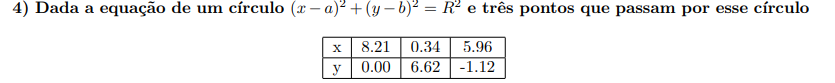

# a) Monte um sistema não-linear para determinar a, b e R.

Substituindo os valores de x e y da tabela na equação da circunferência:

(1)  $(8.21-a)^2 +(-b)^2=R^2$

(2)  $(0.34-a)^2 +(6.62-b)^2=R^2$

(3)  $(5.96-a)^2 +(-1.12-b)^2=R^2$


# b) Resolva o sistema não-linear utilizando os códigos feitos nos itens 2 e 3.


In [16]:
#Define as funções usadas para resolver o sistema não linear
def F(x):#Recebe um vetor x e retorna F(x)
  return [(8.21-x[0])**2+x[1]**2-x[2]**2,(0.34-x[0])**2+(6.62-x[1])**2-x[2]**2,(5.96-x[0])**2+(-1.12-x[1])**2-x[2]**2]

def JacF(x):#Recebe um vetor x e retorna a matriz jacobiana de F calculada em x
  return [[-16.42+2*x[0],2*x[1],-2*x[2]],[-0.68+2*x[0],-13.24+2*x[1],-2*x[2]],[-11.92+2*x[0],2.24+2*x[1],-2*x[2]]]

x0=[1,2,3] #Palpite inicial

#Resolve o sistema não linear usando método de Newton e exibe o tempo necessário
start=time.time()
print(resolver_newton(F,JacF,x0))
print("---Newton: %s segundos---" % (time.time()-start))

#Resolve o sistema não linear usando método de Newton otimizado e exibe o tempo necessário
start=time.time()
print(resolver_newton_opt(F,JacF,x0))
print("---Newton Otimizado: %s segundos---" % (time.time()-start))

[4.83010565 3.96992168 5.21382431]
---Newton: 0.21081972122192383 segundos---
[4.83010565 3.96992168 5.21382431]
---Newton Otimizado: 0.06727004051208496 segundos---


# c) Houve melhora no tempo de execução do código implementado no item 3?

Como é possível ver na saída anterior, a versão otimizada do código roda de 3 a 5 vezes mais rápido que a versão com inversão de matriz

# d) Finalmente, com os resultados a, b e R, utilizando a equa¸c˜ao do c´ırculo dada por (x−a) 2 + (y −b) 2 = R2 , imprima o gr´afico que representa esse c´ırculo

O sistema resolvido no item b) corresponde ao sistema do item a), portanto os valores das variáveis já foram encontrados

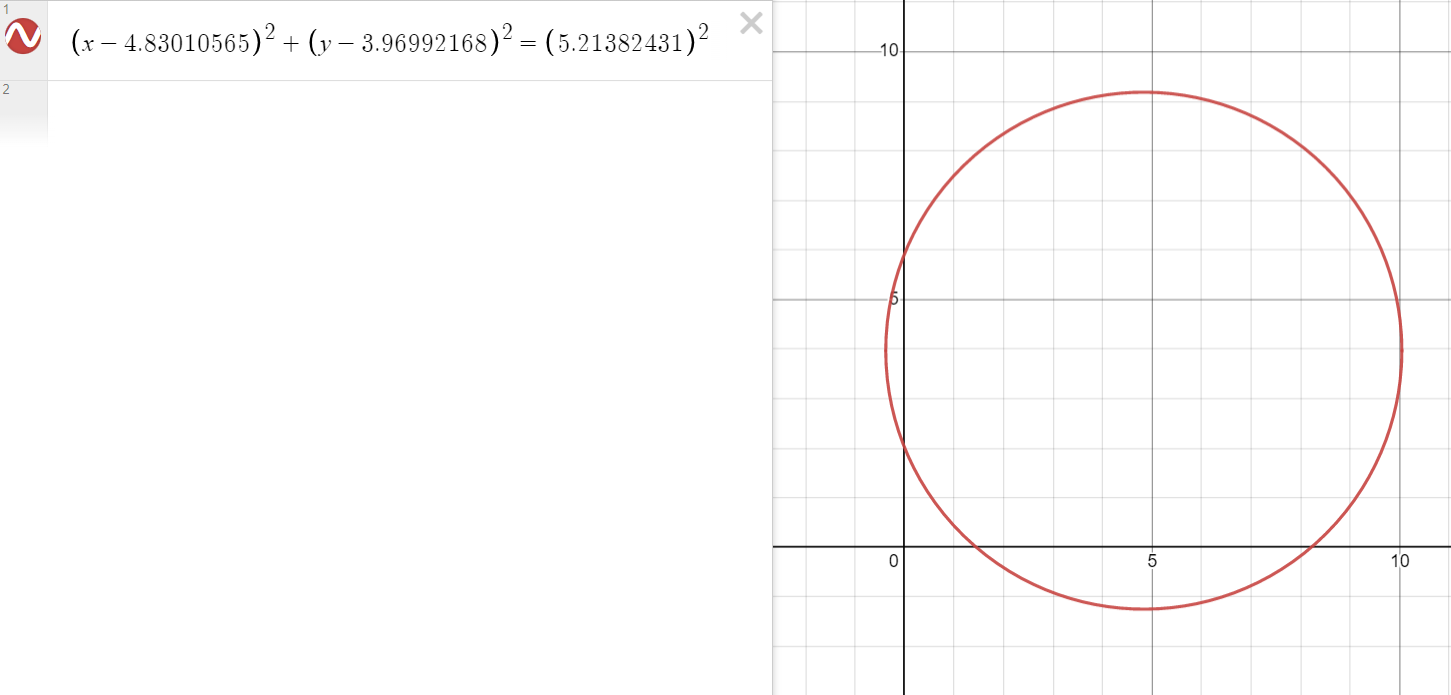

https://www.desmos.com/calculator/uhi6vp9y8p